In [17]:
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os

out_dir = os.path.join('figures', 'cdr3_length')

In [4]:
data_files = glob.glob('data/seq_db/*.txt')

length_dfs = []

for data_file in data_files:
    df = pd.read_csv(data_file, sep='\t')
    try:
        length_df = df.apply(lambda row: len(row['CDR3_aa']), axis=1)
    except TypeError:
        print(data_file)
    length_dfs.append(length_df)

cdr3_lengths = pd.concat(length_dfs)

    

data/seq_db/Briney_2019_Subject_326651_IgM_Subject-326651_Replicate-11_Isotype-IgM.txt
data/seq_db/Gidoni_2019_Light_Healthy-celiac-disease_Bulk_Heavy_Healthy-celiac-disease_S61_Naive-B-Cells_igblastn_Bulk.txt
data/seq_db/Gidoni_2019_Light_Healthy-celiac-disease_Bulk_Heavy_Healthy-celiac-disease_S76_Naive-B-Cells_igblastn_Bulk.txt
data/seq_db/Greiff_2017_NP-HEL_mouse_1_PC_IGHM_IGHG_IGHM_NP-HEL_mouse_1_ERX1825950_long_lived_plasma_cell_bone_marrow_iglblastn_IGHM.txt
data/seq_db/Briney_2019_Subject_326651_IgG_Subject-326651_Replicate-17_Isotype-IgG.txt
data/seq_db/Eliyahu_2018_Heavy_HCV_IGM_IGHM_HCV_SC7_IGM_igblastn_IGHM.txt
data/seq_db/Gidoni_2019_Light_Healthy-celiac-disease_Bulk_Heavy_Healthy-celiac-disease_S39_Naive-B-Cells_igblastn_Bulk.txt
data/seq_db/Gidoni_2019_Light_Healthy-celiac-disease_Bulk_Heavy_Healthy-celiac-disease_S4_Naive-B-Cells_igblastn_Bulk.txt
data/seq_db/Greiff_2017_NP-HEL_mouse_1_pre-B_cell_bone_marrow_IGHM_NP-HEL_mouse_1_ERX1825951_pre-B_cell_bone_marrow_igblastn

1 37


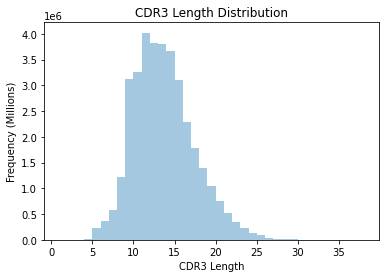

In [13]:
len_min = cdr3_lengths.min()
len_max = cdr3_lengths.max()
print(len_min, len_max)
bins = range(len_min, len_max+2) # last bin is half-open: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist
cdr3_len_hist = sns.distplot(cdr3_lengths, bins=bins, kde=False)
cdr3_len_hist.set(title="CDR3 Length Distribution", ylabel="Frequency (Millions)", xlabel="CDR3 Length")
cdr3_len_hist.figure.savefig('figures/cdr3_length/cdr3_len_hist.png',dpi=600)
plt.show()

In [11]:
counts = cdr3_lengths.value_counts()
counts.to_csv(os.path.join(out_dir, 'cdr3_len_counts.csv'))
counts

In [18]:
summary = cdr3_lengths.describe()
summary.to_csv(os.path.join(out_dir, 'summary_stats.csv'))